# Unsupervised Wisdom: Explore Medical Narratives on Older Adult Falls

    Project Outline

1. Problem Description
2. Introduction to Approach Used
3. Data Cleaning and Preprocessing
4. Exploratory Data Analysis and Data Visualization
5. Model Building
6. Final Inference

---

## 1. Problem Description


 In this challenge, the objective is to delve into the utilization of unsupervised machine learning techniques on emergency department (ED) visit narratives pertaining to falls among older adults aged 65 and above. The ultimate aim is to extract valuable insights from these analyses, which can then be used to shape policies and interventions geared towards mitigating falls in the older adult population.

---

## 2. Introduction to Approach Used

---

## 3. Data Cleaning and Preprocessing

##### Import required modules

In [1]:
import numpy as np
import pandas as pd

import json

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Load the data

In [2]:
data = pd.read_csv("data/primary_data.csv")

#Display an overview of the data
data.head(3)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,body_part,body_part_2,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3
0,190103269,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...,2019-01-01,94,1,0,NaN,0,62,NaN,...,75,NaN,4,5,0,0,0,1807,0,0
1,190103270,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...,2019-01-01,86,1,0,NaN,0,62,NaN,...,75,NaN,4,1,0,0,0,611,0,0
2,190103273,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...,2019-01-01,87,2,0,NaN,0,53,NaN,...,32,NaN,4,1,0,0,0,679,1807,0


In [3]:
data.treatment_date

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
115123    2022-10-22
115124    2022-10-22
115125    2022-10-22
115126    2022-10-24
115127    2022-10-24
Name: treatment_date, Length: 115128, dtype: object

#### Extracting the month from the treatment date

In [4]:

# Convert 'treatment_date' column to datetime if it's not already
data['treatment_date'] = pd.to_datetime(data['treatment_date'])

# Extract the month and create a new column
data['month'] = data['treatment_date'].dt.month


# Create a dictionary to map month values to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}


data['month'] = data['month'].replace(month_mapping)

data


,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,body_part_2,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month
0,190103269,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...,2019-01-01,94,1,0,NaN,0,62,NaN,...,NaN,4,5,0,0,0,1807,0,0,Jan
1,190103270,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...,2019-01-01,86,1,0,NaN,0,62,NaN,...,NaN,4,1,0,0,0,611,0,0,Jan
2,190103273,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...,2019-01-01,87,2,0,NaN,0,53,NaN,...,NaN,4,1,0,0,0,679,1807,0,Jan
3,190103291,67YOF WAS AT A FRIENDS HOUSE AND SLIPPED ON WA...,2019-01-01,67,2,0,NaN,0,57,NaN,...,NaN,1,1,0,0,0,1807,0,0,Jan
4,190103294,70YOF WAS STANDING ON A STEP STOOL AND FELL OF...,2019-01-01,70,2,0,NaN,0,57,NaN,...,NaN,1,1,0,0,0,620,0,0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115123,230217170,81 YOM FELL OUT OF BED. DX: LEFT FEMUR FRACTURE.,2022-10-22,81,1,1,NaN,2,57,NaN,...,NaN,4,1,0,0,0,4076,0,0,Oct
115124,230217171,"72 YOF SLIPPED AND FELL ON THE FLOOR. DX: L-3,...",2022-10-22,72,2,1,NaN,2,57,NaN,...,31.0,4,0,0,0,0,1807,0,0,Oct
115125,230217174,90 YOF TRIPPED AND FELL ON A GARAGE FLOOR. DX:...,2022-10-22,90,2,1,NaN,2,64,NaN,...,NaN,1,1,0,0,0,1807,0,0,Oct
115126,230218390,77 YOM PRESENTS FROM NURSING HOME FOLLOWING UN...,2022-10-24,77,1,1,NaN,2,62,NaN,...,75.0,1,5,0,0,0,1807,0,0,Oct


In [5]:
rows, columns = data.shape
print(f'The data contains {rows:,} rows and {columns} columns')

The data contains 115,128 rows and 23 columns


##### Check and correct column data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115128 entries, 0 to 115127
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   cpsc_case_number   115128 non-null  int64         
 1   narrative          115128 non-null  object        
 2   treatment_date     115128 non-null  datetime64[ns]
 3   age                115128 non-null  int64         
 4   sex                115128 non-null  int64         
 5   race               115128 non-null  int64         
 6   other_race         1022 non-null    object        
 7   hispanic           115128 non-null  int64         
 8   diagnosis          115128 non-null  int64         
 9   other_diagnosis    2522 non-null    object        
 10  diagnosis_2        43145 non-null   float64       
 11  other_diagnosis_2  4978 non-null    object        
 12  body_part          115128 non-null  int64         
 13  body_part_2        43145 non-null   float64 

In [7]:
#Get columns that can be null
columns_null_possibility = data.dtypes[data.dtypes == 'float64'].index

#Set columns that can be null to nullable ints
data[columns_null_possibility] = data[columns_null_possibility].astype('Int64')

In [8]:
#The column data types after changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115128 entries, 0 to 115127
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   cpsc_case_number   115128 non-null  int64         
 1   narrative          115128 non-null  object        
 2   treatment_date     115128 non-null  datetime64[ns]
 3   age                115128 non-null  int64         
 4   sex                115128 non-null  int64         
 5   race               115128 non-null  int64         
 6   other_race         1022 non-null    object        
 7   hispanic           115128 non-null  int64         
 8   diagnosis          115128 non-null  int64         
 9   other_diagnosis    2522 non-null    object        
 10  diagnosis_2        43145 non-null   Int64         
 11  other_diagnosis_2  4978 non-null    object        
 12  body_part          115128 non-null  int64         
 13  body_part_2        43145 non-null   Int64   

##### Check for null values

In [9]:
#Only display columns with null values
null = data.isnull().sum()

null[null != 0]

other_race           114106
other_diagnosis      112606
diagnosis_2           71983
other_diagnosis_2    110150
body_part_2           71983
dtype: int64

There are null values present, but only occur in fields that are optional. So, they can be left without having to perform any operation on them

##### Check for duplicates

In [10]:
data.duplicated().sum()

0

This shows there are no duplicate values for each person-event pairings.   
Though, a person can have more than one record due to different fall events, but will result in different case numbers; thereby each recorded fall remains unique.

##### Variable Mapping

From the data, it shows that some columns like sex, race, e.t.c. have numeric values which can be decoded to their respective strings.   
The data is redisplayed below for easier reference

In [11]:
data.head(3)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,body_part_2,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month
0,190103269,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...,2019-01-01,94,1,0,NaN,0,62,NaN,...,<NA>,4,5,0,0,0,1807,0,0,Jan
1,190103270,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...,2019-01-01,86,1,0,NaN,0,62,NaN,...,<NA>,4,1,0,0,0,611,0,0,Jan
2,190103273,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...,2019-01-01,87,2,0,NaN,0,53,NaN,...,<NA>,4,1,0,0,0,679,1807,0,Jan


In [12]:
#Load the variable mapping file
with open('data/variable_mapping.json', 'r') as f:
    mapping = json.load(f, parse_int=True)

In [13]:
#Overview of the variable mapping file
mapping

{'sex': {'0': 'UNKNOWN', '1': 'MALE', '2': 'FEMALE', '3': 'NON-BINARY/OTHER'},
 'race': {'0': 'N.S.',
  '1': 'WHITE',
  '2': 'BLACK/AFRICAN AMERICAN',
  '3': 'OTHER',
  '4': 'ASIAN',
  '5': 'AMERICAN INDIAN/ALASKA NATIVE',
  '6': 'NATIVE HAWAIIAN/PACIFIC ISLANDER'},
 'hispanic': {'0': 'Unk/Not stated', '1': 'Yes', '2': 'No'},
 'alcohol': {'0': 'No/Unk', '1': 'Yes'},
 'drug': {'0': 'No/Unk', '1': 'Yes'},
 'body_part': {'0': '0 - INTERNAL',
  '30': '30 - SHOULDER',
  '31': '31 - UPPER TRUNK',
  '32': '32 - ELBOW',
  '33': '33 - LOWER ARM',
  '34': '34 - WRIST',
  '35': '35 - KNEE',
  '36': '36 - LOWER LEG',
  '37': '37 - ANKLE',
  '38': '38 - PUBIC REGION',
  '75': '75 - HEAD',
  '76': '76 - FACE',
  '77': '77 - EYEBALL',
  '78': '78 - UPPER TRUNK(OLD)',
  '79': '79 - LOWER TRUNK',
  '80': '80 - UPPER ARM',
  '81': '81 - UPPER LEG',
  '82': '82 - HAND',
  '83': '83 - FOOT',
  '84': '84 - 25-50% OF BODY',
  '85': '85 - ALL PARTS BODY',
  '86': '86 - OTHER(OLD)',
  '87': '87 - NOT STATED/U

Make corrections to the decoded variables where necessary

In [14]:
#Convert the encoded values in the mapping to integers since they get read in as strings
#such as '0' to 0
for c in mapping.keys():
    mapping[c] = {int(k): v for k, v in mapping[c].items()}
    
#Update the "N.S." in race to "Not Stated"
mapping['race'][0] = 'Not Stated'

#Update "Unk" term in the hispanic key to "Unknown/Not stated"
mapping['hispanic'][0] = 'Unknown/Not Stated'

#Update "No/Unk" in the alcohol, drug and location keys to "No/Unknown"
mapping['alcohol'][0] = 'No/Unknown'
mapping['drug'][0] = 'No/Unknown'

#Update "UNK" in the lcoation key to "UNKNOWN"
mapping['location'][0] = 'UNKNOWN'

#Update the fire_involvement keys
fire_updates = ['NO/UNKNOWN', 'FIRE DEPARTMENT', 'NO FIRE DEPARTMENT', 'UNKNOWN FIRE DEPARTMENT', 'MOTOR VEHICLE']
for key, update in enumerate(fire_updates):
    mapping['fire_involvement'][key] = update

In [15]:
#Overview of the variable mapping file after the updates
mapping

{'sex': {0: 'UNKNOWN', 1: 'MALE', 2: 'FEMALE', 3: 'NON-BINARY/OTHER'},
 'race': {0: 'Not Stated',
  1: 'WHITE',
  2: 'BLACK/AFRICAN AMERICAN',
  3: 'OTHER',
  4: 'ASIAN',
  5: 'AMERICAN INDIAN/ALASKA NATIVE',
  6: 'NATIVE HAWAIIAN/PACIFIC ISLANDER'},
 'hispanic': {0: 'Unknown/Not Stated', 1: 'Yes', 2: 'No'},
 'alcohol': {0: 'No/Unknown', 1: 'Yes'},
 'drug': {0: 'No/Unknown', 1: 'Yes'},
 'body_part': {0: '0 - INTERNAL',
  30: '30 - SHOULDER',
  31: '31 - UPPER TRUNK',
  32: '32 - ELBOW',
  33: '33 - LOWER ARM',
  34: '34 - WRIST',
  35: '35 - KNEE',
  36: '36 - LOWER LEG',
  37: '37 - ANKLE',
  38: '38 - PUBIC REGION',
  75: '75 - HEAD',
  76: '76 - FACE',
  77: '77 - EYEBALL',
  78: '78 - UPPER TRUNK(OLD)',
  79: '79 - LOWER TRUNK',
  80: '80 - UPPER ARM',
  81: '81 - UPPER LEG',
  82: '82 - HAND',
  83: '83 - FOOT',
  84: '84 - 25-50% OF BODY',
  85: '85 - ALL PARTS BODY',
  86: '86 - OTHER(OLD)',
  87: '87 - NOT STATED/UNK',
  88: '88 - MOUTH',
  89: '89 - NECK',
  90: '90 - LOWER AR

Map the keys to a copy of the dataframe

In [16]:
decoded_data = data.copy()

#Map the keys to the new dataframe
for col in mapping.keys():
    decoded_data[col] = decoded_data[col].map(mapping[col])
    
#Ensure mappings were applied correctly by checking that the number of missing values did not change
assert (decoded_data.isnull().sum() == data.isnull().sum()).all()

In [17]:
#An overview of the new dataset with decoded values
decoded_data.head(3)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,body_part_2,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month
0,190103269,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...,2019-01-01,94,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,NaN,4 - TREATED AND ADMITTED/HOSPITALIZED,PUBLIC,NO/UNKNOWN,No/Unknown,No/Unknown,1807 - FLOORS OR FLOORING MATERIALS,0 - None,0 - None,Jan
1,190103270,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...,2019-01-01,86,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,NaN,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,611 - BATHTUBS OR SHOWERS,0 - None,0 - None,Jan
2,190103273,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...,2019-01-01,87,FEMALE,Not Stated,NaN,Unknown/Not Stated,"53 - CONTUSIONS, ABR.",NaN,...,NaN,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,"679 - SOFAS, COUCHES, DAVENPORTS, DIVANS OR ST...",1807 - FLOORS OR FLOORING MATERIALS,0 - None,Jan


##### Data Preprocessing 1...

The narrative column can be cleaned to remove any character that isn't a word or a space, afterwards remove words that are considered stop words, replace extra spaces with just a space, while converting the texts to lower case.

In [18]:
#Make a copy of the original narrative column to a new column in case of future reference
decoded_data['narrative_original'] = decoded_data['narrative'].copy()


#Remove any character that isn't a word or a space and convert to lower case
decoded_data['narrative'] = decoded_data['narrative'].str.lower().str.replace(r'[^\w\s]',' ', regex = True)

#Remove stop words
stop_words = set(stopwords.words('english'))
decoded_data['narrative'] = decoded_data['narrative'].apply(lambda texts: ' '.join([word for word in texts.split() if word not in stop_words]))

#Remove any single character
decoded_data['narrative'] = decoded_data['narrative'].str.replace(r'\b\w\b', ' ', regex = True)

#Replace more than one occurence of spaces to just a space and also remove spaces from the beginning and end of the texts
decoded_data['narrative'] = decoded_data['narrative'].str.replace(r'\s{2,}', ' ', regex = True).str.strip()

In [19]:
#An overview of the dataset after recent changes
decoded_data.head(3)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month,narrative_original
0,190103269,94yom fell floor nursing home onto back head s...,2019-01-01,94,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,PUBLIC,NO/UNKNOWN,No/Unknown,No/Unknown,1807 - FLOORS OR FLOORING MATERIALS,0 - None,0 - None,Jan,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...
1,190103270,86yom fell shower home sustained closed head i...,2019-01-01,86,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,611 - BATHTUBS OR SHOWERS,0 - None,0 - None,Jan,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...
2,190103273,87yof getting couch fell floor sustained abras...,2019-01-01,87,FEMALE,Not Stated,NaN,Unknown/Not Stated,"53 - CONTUSIONS, ABR.",NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,"679 - SOFAS, COUCHES, DAVENPORTS, DIVANS OR ST...",1807 - FLOORS OR FLOORING MATERIALS,0 - None,Jan,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...


##### Data Preprocessing 2...

From the recently decoded data above, the narrative column contains some redundancies, which are the age and sex which already exist in other columns.    
An example is "94YOM FELL..."

Removing these redundancies by removing any pattern similar to "94 yom" or "94yom" or "94ym" or "94yo m" or a scenario like "94yowm"

In [20]:
#Remove the redundancies
decoded_data['narrative'] = decoded_data['narrative'].str.replace(r'\d+\s*yo*\s*\w\w*\s', '', regex = True)

In [21]:
#An overview of the dataset after recent changes
decoded_data.head(3)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month,narrative_original
0,190103269,fell floor nursing home onto back head sustain...,2019-01-01,94,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,PUBLIC,NO/UNKNOWN,No/Unknown,No/Unknown,1807 - FLOORS OR FLOORING MATERIALS,0 - None,0 - None,Jan,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...
1,190103270,fell shower home sustained closed head injury,2019-01-01,86,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,611 - BATHTUBS OR SHOWERS,0 - None,0 - None,Jan,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...
2,190103273,getting couch fell floor sustained abrasions e...,2019-01-01,87,FEMALE,Not Stated,NaN,Unknown/Not Stated,"53 - CONTUSIONS, ABR.",NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,"679 - SOFAS, COUCHES, DAVENPORTS, DIVANS OR ST...",1807 - FLOORS OR FLOORING MATERIALS,0 - None,Jan,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...


##### Data Preprocessing 3...
To have uniform narratives, each word in all narratives are converted to their base form using lemmatization

In [22]:
#Write a function to handle the lemmatization
lemmatizer = WordNetLemmatizer()

def convert_to_base(sentence):
    splitted_sentence = sentence.split()
    
    #A verb lemmatizer is used since the circumstances surrounding falls are potentially more verb-like
    sentence_base_form = ' '.join([lemmatizer.lemmatize(word, pos = 'v') for word in splitted_sentence])
    
    return sentence_base_form

Apply the lemmatization function to each narrative

In [23]:
decoded_data['narrative'] = decoded_data['narrative'].apply(lambda sentence: convert_to_base(sentence))

In [24]:
#An overview of the dataset after recent changes
decoded_data.head(3)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month,narrative_original
0,190103269,fell floor nurse home onto back head sustain s...,2019-01-01,94,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,PUBLIC,NO/UNKNOWN,No/Unknown,No/Unknown,1807 - FLOORS OR FLOORING MATERIALS,0 - None,0 - None,Jan,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...
1,190103270,fell shower home sustain close head injury,2019-01-01,86,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,611 - BATHTUBS OR SHOWERS,0 - None,0 - None,Jan,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...
2,190103273,get couch fell floor sustain abrasions elbow a...,2019-01-01,87,FEMALE,Not Stated,NaN,Unknown/Not Stated,"53 - CONTUSIONS, ABR.",NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,"679 - SOFAS, COUCHES, DAVENPORTS, DIVANS OR ST...",1807 - FLOORS OR FLOORING MATERIALS,0 - None,Jan,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...


##### Data Preprocessing 4...

According the NEISS coding manual, a narrative should contain a diagnosis preceded by DX. Since, this reserch is to extract valuable insights that can help mitigate falls in the older adult population, we'll not be focusing on the diagnosis. This is because the diagnosis happens after a fall, not a circumstance before the fall.   

Thus, the diagnosis stated in the narratives will be excluded, as it is also present as independent column (diagnosis columns).

Upon closer inspection of the narrative column, some narratives do have the diagnosis following the word "sustain", while some, a word before and after "fx" meaning fracture (such as "hip fx", "compression fx lower back"). So, all these terms will be used as watchwords where any text after them will be removed

In [25]:
decoded_data['narrative'] = decoded_data['narrative'].apply(lambda x: re.sub(r'\s*dx.*|\s*sustain.*|\s*\w+\s*fx.*', '', x))

In [26]:
#An overview of the dataset after recent changes
decoded_data.head()

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month,narrative_original
0,190103269,fell floor nurse home onto back head,2019-01-01,94,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,PUBLIC,NO/UNKNOWN,No/Unknown,No/Unknown,1807 - FLOORS OR FLOORING MATERIALS,0 - None,0 - None,Jan,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...
1,190103270,fell shower home,2019-01-01,86,MALE,Not Stated,NaN,Unknown/Not Stated,62 - INTERNAL INJURY,NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,611 - BATHTUBS OR SHOWERS,0 - None,0 - None,Jan,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...
2,190103273,get couch fell floor,2019-01-01,87,FEMALE,Not Stated,NaN,Unknown/Not Stated,"53 - CONTUSIONS, ABR.",NaN,...,4 - TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,"679 - SOFAS, COUCHES, DAVENPORTS, DIVANS OR ST...",1807 - FLOORS OR FLOORING MATERIALS,0 - None,Jan,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...
3,190103291,friends house slip water floor,2019-01-01,67,FEMALE,Not Stated,NaN,Unknown/Not Stated,57 - FRACTURE,NaN,...,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,1807 - FLOORS OR FLOORING MATERIALS,0 - None,0 - None,Jan,67YOF WAS AT A FRIENDS HOUSE AND SLIPPED ON WA...
4,190103294,stand step stool fell,2019-01-01,70,FEMALE,Not Stated,NaN,Unknown/Not Stated,57 - FRACTURE,NaN,...,1 - TREATED/EXAMINED AND RELEASED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,620 - STEP STOOLS,0 - None,0 - None,Jan,70YOF WAS STANDING ON A STEP STOOL AND FELL OF...


##### Data Preprocessing 5...

From the displayed data above, some columns still have their encoded value present in their decoded value.   
An example is "62 - INTERNAL INJURY" in the diagnosis column.

Using the first data as a reference, one can derive the columns with such disparities.

In [27]:
first = decoded_data.iloc[0]

#Only display columns that start with a pattern similar to "62 - INTERNAL INJURY"
encoded_still_present = first[first.str.match(r'^\d+\s\-\s\w+') == True]

encoded_still_present

diagnosis                       62 - INTERNAL INJURY
body_part                                  75 - HEAD
disposition    4 - TREATED AND ADMITTED/HOSPITALIZED
product_1        1807 - FLOORS OR FLOORING MATERIALS
product_2                                   0 - None
product_3                                   0 - None
Name: 0, dtype: object

This pattern can be followed to remove redundancies like the digits and everything else leading up to the expected decoded value, in these columns


In [28]:
#Remove the redundancies for the observed columns
for column in encoded_still_present.index:
    decoded_data[column].replace(r'^\d+\s\-\s', '', regex = True, inplace = True)

In [29]:
#An overview of the dataset after changes
decoded_data.head(3)

,cpsc_case_number,narrative,treatment_date,age,sex,race,other_race,hispanic,diagnosis,other_diagnosis,...,disposition,location,fire_involvement,alcohol,drug,product_1,product_2,product_3,month,narrative_original
0,190103269,fell floor nurse home onto back head,2019-01-01,94,MALE,Not Stated,NaN,Unknown/Not Stated,INTERNAL INJURY,NaN,...,TREATED AND ADMITTED/HOSPITALIZED,PUBLIC,NO/UNKNOWN,No/Unknown,No/Unknown,FLOORS OR FLOORING MATERIALS,None,None,Jan,94YOM FELL TO THE FLOOR AT THE NURSING HOME ON...
1,190103270,fell shower home,2019-01-01,86,MALE,Not Stated,NaN,Unknown/Not Stated,INTERNAL INJURY,NaN,...,TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,BATHTUBS OR SHOWERS,None,None,Jan,86YOM FELL IN THE SHOWER AT HOME AND SUSTAINED...
2,190103273,get couch fell floor,2019-01-01,87,FEMALE,Not Stated,NaN,Unknown/Not Stated,"CONTUSIONS, ABR.",NaN,...,TREATED AND ADMITTED/HOSPITALIZED,HOME,NO/UNKNOWN,No/Unknown,No/Unknown,"SOFAS, COUCHES, DAVENPORTS, DIVANS OR STUDIO C...",FLOORS OR FLOORING MATERIALS,None,Jan,87YOF WAS GETTING UP FROM THE COUCH AND FELL T...


---

## 4. Exploratory Data Analysis and Data Visualization

##### Import required modules

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#### <pre>4.1   UNIVARIATE ANALYSIS AND VISUALIZATION </pre>

##### Age Distribution

Split the ages into age groups and visualize the age groups

In [31]:
# Defining custom age bins
age_bins = [65, 71, 77, 83, 89, 95, 101, 107, 113,]  

# Define labels for the age groups
age_labels = ['65-70', '71-76', '77-82', '83-88', '89-94', '95-100', '101-106', '107-112']

# Create a new column 'age_group' based on the custom age bins
decoded_data['age_group'] = pd.cut(decoded_data['age'], bins=age_bins, labels=age_labels)

# Display the first few rows of the DataFrame with the age groups
decoded_data[['age', 'age_group']][:5]

,age,age_group
0,94,89-94
1,86,83-88
2,87,83-88
3,67,65-70
4,70,65-70


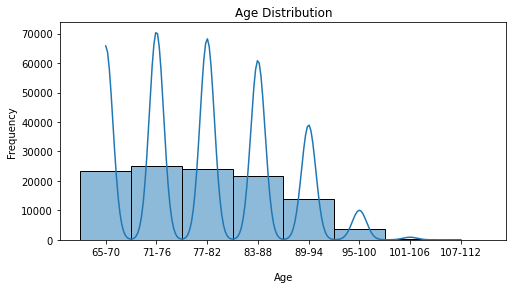

In [32]:
plt.figure(figsize=(8, 4))

sns.histplot(decoded_data['age_group'], bins = 20, kde = True)

plt.title('Age Distribution')
plt.xlabel('Age', labelpad = 15)
plt.ylabel('Frequency');

In this analysis, it becomes evident that the age distribution within the elderly population is generally between 65 to 88 years, indicating that a significant proportion of the elderly population fall within this specific range.

##### Gender Distribution

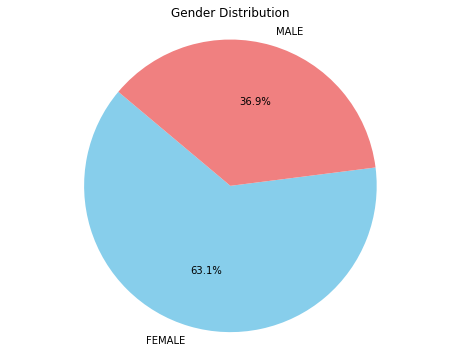

In [33]:
# Calculate the count of each gender category
gender_counts = decoded_data['sex'].value_counts()

plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])

plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


There is a higher proportion of females than males in this dataset.

##### Race Distribution

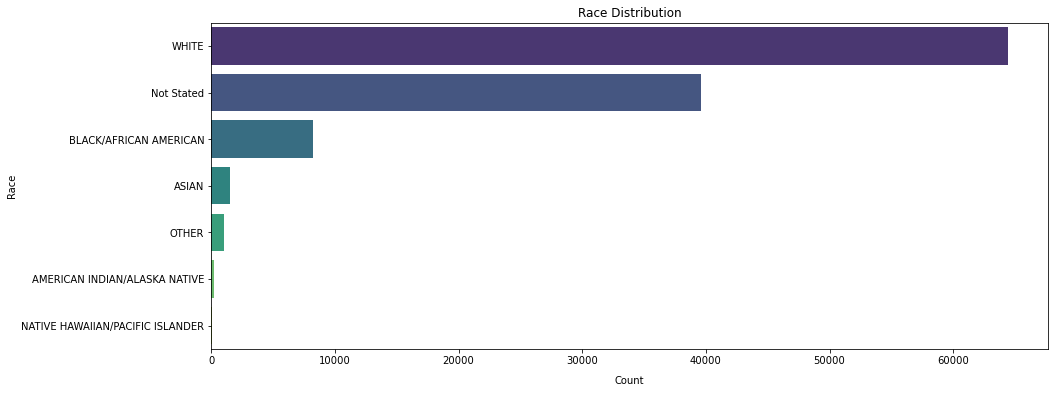

In [34]:
# Calculate the count of occurrences for each race category
race_counts = decoded_data['race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

plt.figure(figsize=(15, 6))


# Create a violin plot for the count of occurrences
sns.barplot(data=race_counts, x='Count', y='Race', palette='viridis')

plt.title('Race Distribution')
plt.xlabel('Count', labelpad=10)
plt.ylabel('Race')

plt.show()


There is a high proportion of whites, while a considerable amount of patients' race were not stated in the dataset.

##### Diagnosis Distribution

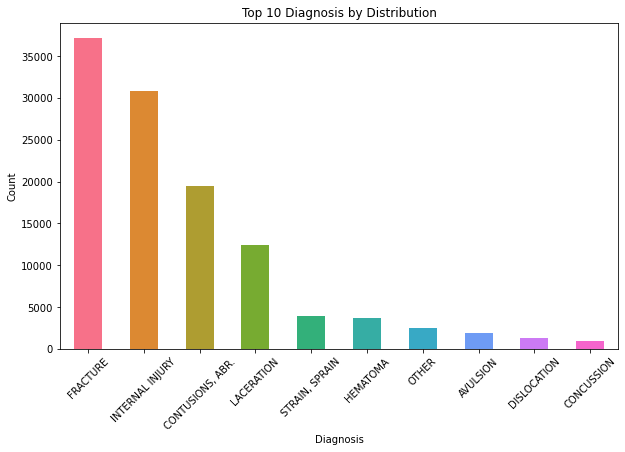

In [35]:

# Get the top 10 diagnoses
top_10_diagnosis = decoded_data['diagnosis'].value_counts().head(10)

# Define a custom color palette for the bars
colors = sns.color_palette("husl", len(top_10_diagnosis))

# Create a bar chart with the specified colors
plt.figure(figsize=(10, 6))
top_10_diagnosis.plot(kind='bar', color=colors)

plt.title('Top 10 Diagnosis by Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


These are the top 10 most frequently occurring diagnosis in this dataset, revealing the primary health conditions experienced by older individuals when they fall; with fractures being the most occuring.

##### Body Parts Distribution

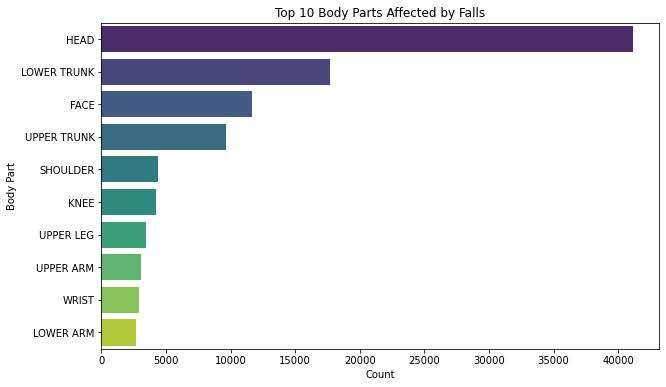

In [36]:
# Get the top 10 body parts affected by falls
top_10_body_part = decoded_data['body_part'].value_counts().head(10)

plt.figure(figsize=(10, 6))

# Create a bar chart with vertical bars
sns.barplot(x=top_10_body_part.values, y=top_10_body_part.index, palette='viridis')

plt.title('Top 10 Body Parts Affected by Falls')
plt.xlabel('Count')
plt.ylabel('Body Part')

plt.xticks(rotation=0)  # No rotation for better readability

plt.show()


When older individuals fall, these body parts are more susceptible to being affected with the head being the most affected.

### Month falls occur the most

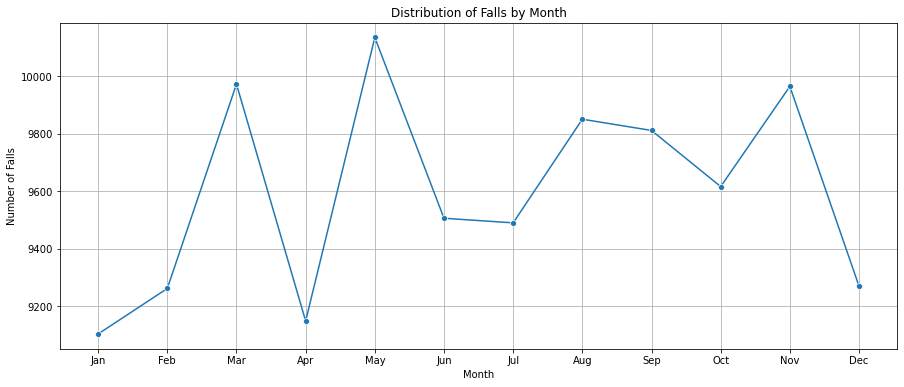

In [37]:
 # Count the number of falls per month
fall_month_counts = decoded_data['month'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(15, 6))
sns.lineplot(x=fall_month_counts.index, y=fall_month_counts.values, marker='o')

plt.title('Distribution of Falls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Falls')

# Customize the x-axis labels with month names (optional)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(fall_month_counts.index, month_names)

plt.grid(True)
plt.show()

#### May as Peak Month: May stands out as the peak month for falls. This could be due to specific activities or events that are more common in May, such as memorial day celebration or spring cleaning, which may increase the risk of falls.

**Insights:**

1. **Memorial Day Celebrations and Family Gatherings:** Memorial Day often involves family gatherings, where relatives come together to celebrate. During these gatherings, several factors may contribute to falls among older adults:

   - **Toy Clutter at Home:** Families with children may have toys and other items scattered around the house during gatherings, creating potential tripping hazards for older adults.
   
   - **Decoration of Graves:** Memorial Day traditions, such as visiting cemeteries and memorials to decorate graves, may require older adults to navigate uneven terrain or walk on unfamiliar surfaces in public places.

2. **Location of Falls:**
   - Falls during Memorial Day celebrations primarily occur at home due to the presence of family members, especially children, and potential tripping hazards.
   - The second-highest number of falls occurs in public places, such as cemeteries or memorials, where older adults may be visiting gravesites.

**Possible Solutions:**

1. **Home Safety Measures:**
   - **Clear Walkways:** Encourage family members to keep walkways clear of toys, clutter, or other items during family gatherings. Designate a play area for children to minimize toy scattering.
   - **Home Inspection:** Regularly inspect the home for potential fall hazards, such as loose rugs or slippery surfaces, and address them promptly.
   - **Family Awareness:** Raise awareness among family members, especially children, about the importance of keeping common areas safe for older adults. Encourage everyone to pick up toys and maintain a clutter-free environment.

2. **Public Safety Precautions:**
   - **Sturdy Footwear:** Advise older adults to wear appropriate, sturdy footwear with good traction when visiting public places or cemeteries to enhance stability.
   - **Assistance:** If possible, provide assistance to older family members when navigating uneven terrain or unfamiliar locations.
   - **Supportive Aids:** Consider using assistive devices like canes or walkers when visiting locations with challenging terrain.

3. **Planning and Organization:**
   - **Event Planning:** When hosting family gatherings for Memorial Day, plan and organize the event to minimize potential fall hazards. Designate play areas for children, provide seating for older adults, and create a safe environment.
   - **Transportation:** Ensure that older adults have safe transportation to and from public events, such as visiting cemeteries, to reduce the risk of falls during travel.



#### Products that causes the most fall

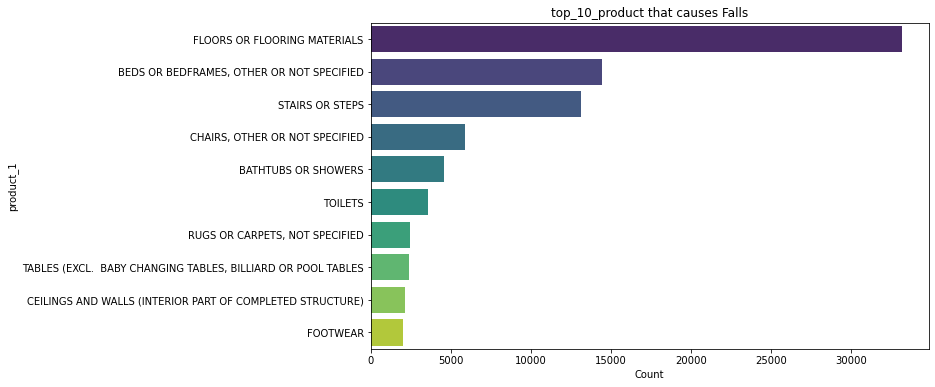

In [38]:
# Get the top 10 primary products
top_10_product = decoded_data['product_1'].value_counts().head(10)

plt.figure(figsize=(10, 6))

# Create a bar chart with vertical bars
sns.barplot(x=top_10_product.values, y=top_10_product.index, palette='viridis')

plt.title('top_10_product that causes Falls')
plt.xlabel('Count')
plt.ylabel('product_1')

plt.xticks(rotation=0)  # No rotation for better readability

plt.show()


 The observation that floors or flooring materials, beds or bedframes, stairs or steps, chairs, bathtubs or showers, and toilets are products that cause the most falls in older adults provides valuable insights into the common sources of falls. Here are the insights and potential solutions based on these observations:

**Insights:**

1. **Home Environment:** Many falls among older adults occur within their own homes. This suggests that the home environment plays a significant role in fall risk.

2. **Key Risk Areas:** Specific areas and products within the home are identified as frequent sources of falls. These include floors, beds, stairs, chairs, bathtubs, and toilets.

3. **Variety of Causes:** Falls can result from various causes, such as slipping, tripping, loss of balance, or difficulty getting on or off furniture or fixtures.

4. **Common Activities:** Falls may occur during common activities of daily living, such as moving around the home, getting in and out of bed, using the bathroom, or navigating stairs.

**Potential Solutions:**

1. **Home Safety Assessment:**
   - **Professional Assessment:** Conduct a home safety assessment with the help of healthcare professionals or occupational therapists. They can identify specific hazards and recommend modifications.

2. **Flooring and Stairs:**
   - **Non-Slip Flooring:** Install non-slip flooring materials in high-risk areas like bathrooms, kitchens, and entryways.
   - **Stair Safety:** Ensure that stairs are well-lit, have sturdy handrails on both sides, and have non-slip treads. Consider installing a chairlift or ramp if needed.

3. **Bedroom:**
   - **Bed Height:** Adjust the height of the bed to make it easier for older adults to get in and out safely. Bed rails or grab bars can provide additional support.

4. **Chairs:**
   - **Stable Chairs:** Choose stable and sturdy chairs with armrests that provide support when sitting down or getting up.
   - **Chair Mats:** Consider using chair mats with anti-slip backing to prevent chairs from sliding on smooth flooring.

5. **Bathroom:**
   - **Grab Bars:** Install grab bars near the toilet, shower, and bathtub for support when sitting down, standing up, or bathing.
   - **Bath Mats:** Use non-slip bath mats inside the shower or bathtub and outside to prevent slipping.

6. **Toilet:**
   - **Raised Toilet Seat:** Consider using a raised toilet seat to make it easier for older adults to sit down and stand up.
   - **Toilet Safety Rails:** Install toilet safety rails for added support and stability.

7. **General Safety Measures:**
   - **Good Lighting:** Ensure adequate lighting throughout the home, especially in hallways, staircases, and bathrooms.
   - **Declutter:** Remove clutter and obstacles from walkways and living spaces.
   - **Footwear:** Encourage the use of appropriate, non-slip footwear, even when indoors.
   - **Regular Maintenance:** Regularly maintain and repair flooring, furniture, and fixtures to prevent hazards.


8. **Assistive Devices:**
   - Consider using assistive devices such as canes, walkers, or mobility aids to enhance stability and support.

9. **Emergency Response:** Ensure that older adults have a way to call for help in case of a fall, such as a medical alert system or a mobile phone.

By addressing these insights and implementing these solutions, you can significantly reduce the risk of falls among older adults and create a safer and more supportive living environment. Regular assessment and adjustments to the home's safety features can help maintain a safe environment as older adults' needs change over time.

#### <pre>4.2   BIVARIATE ANALYSIS AND VISUALIZATION (with detailed insights)</pre>

This starts with analysing factors specific to individuals; like Age, Sex and Race   
Then moving on to environmental factors; specifically Location   
And then, analysing intake of substances around the duration of the fall; such as Drugs and Alcohol. 

##### Demographic Factors (Age vs Diagnosis)

In [39]:
#Get the data that matches with the top 10 diagnosis
top_10_diagnosis = decoded_data['diagnosis'].value_counts().head(10).index
decoded_data_filtered = decoded_data[decoded_data['diagnosis'].isin(top_10_diagnosis)]

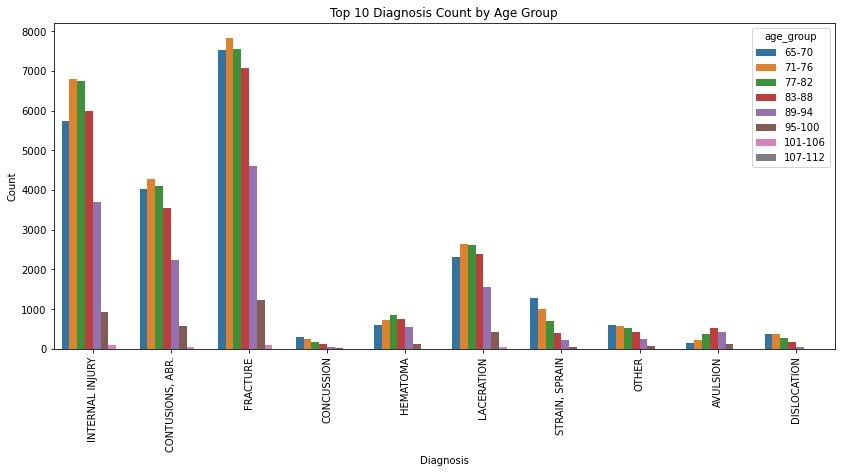

In [40]:
#Plot the data
plt.figure(figsize=(14, 6))

sns.countplot(data = decoded_data_filtered, x = 'diagnosis', hue = 'age_group')

plt.title('Top 10 Diagnosis Count by Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.xticks(rotation=90);

- ##### Insights on age-related injury trends: 

The data reveals clear age-related patterns in the types of injuries diagnosed after falls. As individuals advance in age, they exhibit distinct injury patterns, highlighting the importance of age as a risk factor for certain types of injuries.

Increased Risk of Internal Injuries (Ages 71-82): The finding that people between the ages of 71 and 82 are more frequently diagnosed with internal injuries following falls suggests that this age group may be particularly susceptible to injuries affecting internal organs. This vulnerability might be linked to age-related physiological changes or underlying health conditions.

Contusions and Auditory Brainstem Response (ABR) in Older Age Groups (Ages 65-82): The higher incidence of contusions (bruises) and the presence of auditory brainstem response (ABR) diagnoses within the age range of 65 to 82 indicate that falls in this age group not only result in physical injuries but may also have neurological or auditory implications. This finding underscores the need for a holistic assessment of falls in older adults.

Elevated Fracture Rates (Ages 65-88): The significant prevalence of fractures among individuals aged 65 to 88, with a notably higher rate, underscores the heightened risk of bone fractures in older age. This increased susceptibility might be attributed to factors such as reduced bone density and diminished musculoskeletal strength, which amplify the risk of fractures during falls.

##### Gender Factors (Sex vs Diagnosis)

This compares the genders against the top three diagnosis

In [41]:
#Get the data that matches with the top 3 diagnosis
top_3_diagnosis = decoded_data['diagnosis'].value_counts().head(3).index
decoded_data_filtered_2 = decoded_data[decoded_data['diagnosis'].isin(top_3_diagnosis)]

Create the data for a percentage stacked bar chart

In [42]:
# Calculate the proportions of each diagnosis by gender
diagnosis_by_sex = decoded_data_filtered_2.groupby(['sex', 'diagnosis']).size() / decoded_data_filtered_2.groupby('sex').size()

# Reset the index for the proportions
diagnosis_by_sex = diagnosis_by_sex.reset_index(name = 'Proportion')

# Pivot the data to create a percentage stacked bar chart
pivot_table = diagnosis_by_sex.pivot(index = 'sex', columns = 'diagnosis', values = 'Proportion')

# Normalize the data to percentages (multiply by 100)
pivot_table *= 100

Plot the visualization

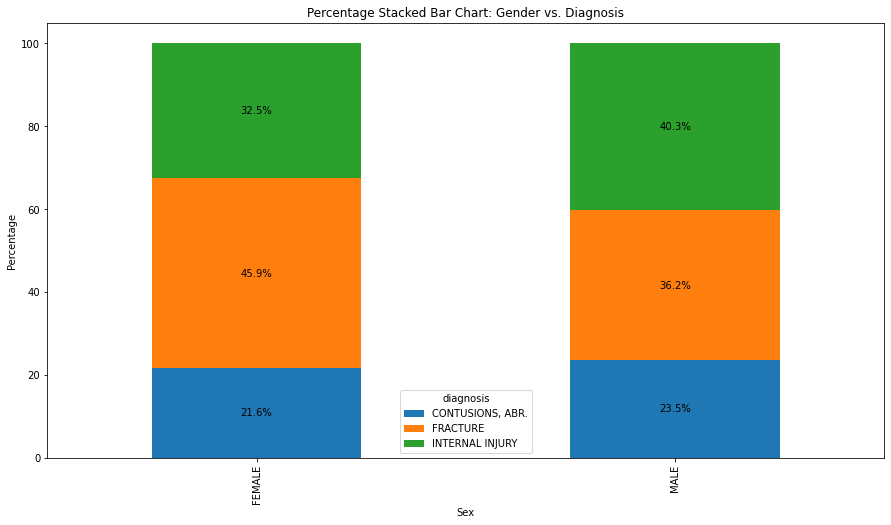

In [43]:
# Plot the percentage stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Chart: Gender vs. Diagnosis')

# Add data labels to each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

- ##### Insights on gender-specific injury patterns:

The data reveals gender-specific patterns in the types of injuries diagnosed after falls. These differences highlight the importance of considering gender as a factor in understanding and addressing specific health outcomes.

Higher Incidence of Internal Injury in Males: The higher occurrence of internal injury diagnoses in males suggests that men may be more susceptible to injuries affecting internal organs following falls. This finding may be indicative of gender-related physiological differences or variations in injury mechanisms.

Contusion and Auditory Brainstem Response (ABR) in Males: The prevalence of contusion and auditory brainstem response (ABR) diagnoses in males implies that men are more likely to experience bruises or minor injuries and may also be at greater risk of auditory or neurological issues following falls.

Fractures More Common in Females: The observation that fractures are diagnosed more frequently in females suggests that women may face a higher risk of bone fractures during falls. This could be influenced by factors such as bone density, physical activity, or age-related changes affecting bone health.

##### Racial Factors (Race vs Diagnosis)

This compares the races against the top three diagnosis

In [44]:
# Calculate the proportions of each diagnosis by race
diagnosis_by_race = decoded_data_filtered_2.groupby(['race', 'diagnosis']).size() / decoded_data_filtered_2.groupby('race').size()

# Reset the index for the proportions
diagnosis_by_race = diagnosis_by_race.reset_index(name = 'Proportion')

# Pivot the data to create a percentage stacked bar chart
pivot_table_2 = diagnosis_by_race.pivot(index = 'race', columns = 'diagnosis', values = 'Proportion')

# Normalize the data to percentages (multiply by 100)
pivot_table_2 *= 100

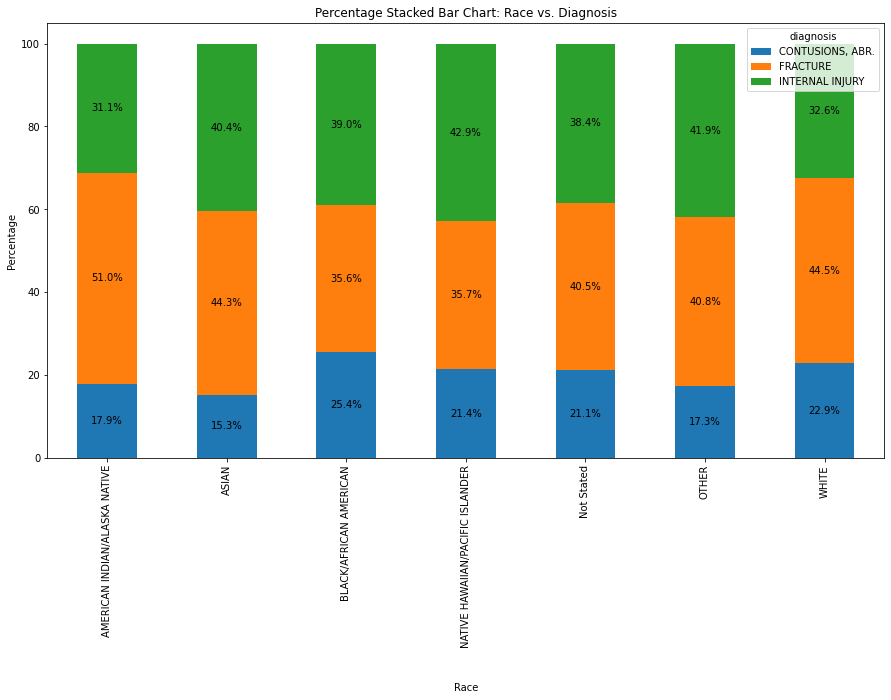

In [45]:
#Plot the percentage stacked bar chart
ax = pivot_table_2.plot(kind = 'bar', stacked = True, figsize = (15, 8))

# Add labels and a title
plt.xlabel('Race', labelpad = 35)
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Chart: Race vs. Diagnosis')

# Add data labels to each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

- ##### Insights on racial disparities in diagnosis patterns: 

The data indicates that there are disparities in the types of diagnoses individuals receive following falls among different racial groups. These disparities may reflect variations in healthcare access, socioeconomic factors, or underlying health conditions within these populations.

Higher Occurrence of Internal Injuries in Native Hawaiian/Pacific Islander: The higher incidence of internal injury diagnoses in the Native Hawaiian/Pacific Islander group suggests that individuals from this racial background may be more susceptible to injuries affecting internal organs after falling. Further research is needed to understand the specific factors contributing to this pattern.

Contusions and Auditory Brainstem Response (ABR) in Black/African American: The prevalence of contusion and auditory brainstem response (ABR) diagnoses in the Black/African American population may indicate that falls in this racial group not only result in physical injuries (contusions) but may also have neurological or auditory implications (ABR). This finding underscores the need for comprehensive assessments and care for fall-related injuries in this demographic.

Fractures More Common in American Indian/Alaska Native: The observation that fractures are diagnosed more frequently in the American Indian/Alaska Native population suggests that individuals from this racial background may be at a higher risk of bone fractures following falls. Factors contributing to this risk may include variations in bone health, activity levels, or other sociocultural factors.

##### Environmental Factors 1 (Location vs Diagnosis)

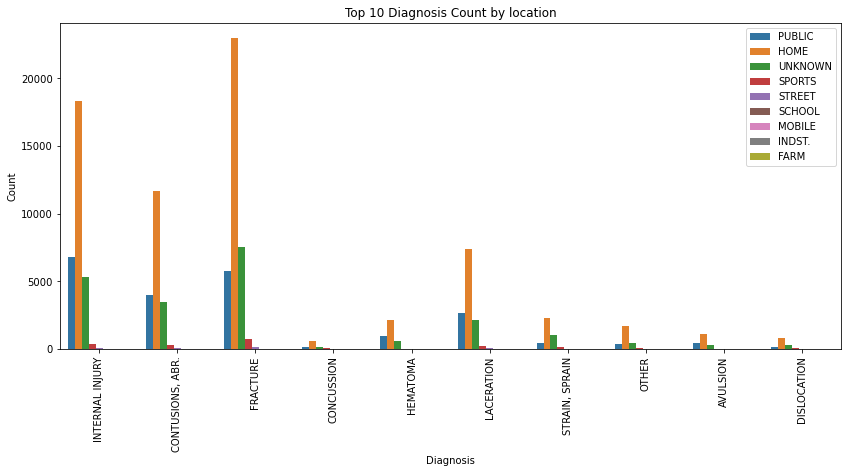

In [46]:
plt.figure(figsize=(14, 6))

sns.countplot(data = decoded_data_filtered, x = 'diagnosis', hue = 'location')

plt.title('Top 10 Diagnosis Count by location')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.legend(loc = 'upper right')
plt.xticks(rotation=90);

- ##### Insights on fall diagnosis by location

The observation that most falls occur at home, unknown locations, and in public areas provides valuable insights into fall prevention and safety measures. Here are insights and potential solutions based on this observation:

Home as a Common Location: The fact that a significant number of falls occur at home underscores the importance of home safety for individuals of all ages, particularly for older adults who may spend a substantial amount of time at home. This highlights the need to encourage home safety assessments, particularly for older adults, to identify and address potential fall hazards at home. This may include removing tripping hazards, improving lighting, installing handrails, and making bathrooms more accessible.

Public Spaces: Falls in public areas highlight the need for public safety measures and awareness campaigns to reduce the risk of falls in crowded places.

Unknown Locations: The "unknown location" category may indicate that some falls happen in unmonitored or less-traveled areas, making it challenging to identify and respond to these incidents promptly. A solution can be for older adults to get guides which can help them navigate unknown locations

##### Environmental Factors 2 (Location vs Disposition)

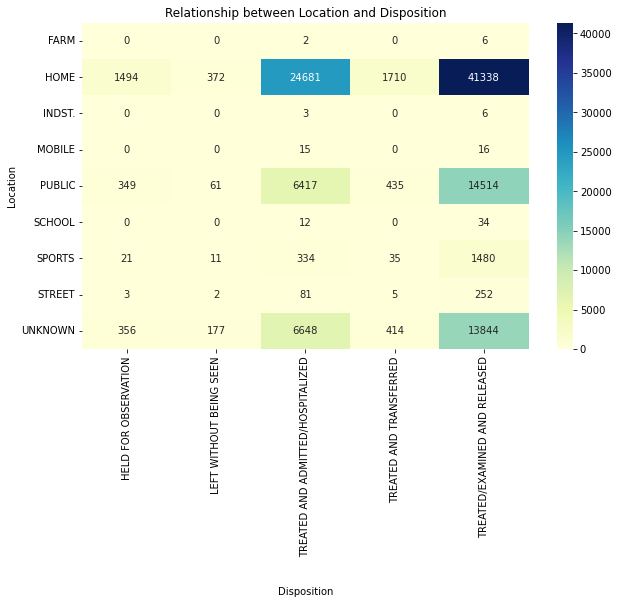

In [47]:
# Visualize the relationship between location and disposition using a heatmap
plt.figure(figsize=(10, 6))

location_disposition_cross_tab = pd.crosstab(decoded_data['location'], decoded_data['disposition'])
sns.heatmap(location_disposition_cross_tab, annot = True, fmt = 'd', cmap = 'YlGnBu')

plt.title('Relationship between Location and Disposition')
plt.xlabel('Disposition', labelpad = 30)
plt.ylabel('Location');

- ##### Insights on fall disposition by location

Falls at home are more common but result in a mix of treatment outcomes: a significant number of individuals are treated and released, while a substantial number require hospitalization, but the **"treated and transferred"** and **"left without being seen"** caught our attention. Why?

- ##### Extra Insights on the "treated and transferred" disposition
Here are some possible interpretations regarding the "treated and transferred" disposition:

1. Severity of Condition: Individuals who were "treated and transferred" may have had medical conditions or injuries that required immediate treatment in one healthcare facility but needed specialized care or further evaluation at another facility. This suggests that their conditions were of a moderate to high severity.

2. Availability of Specialized Services: The initial healthcare facility where they were treated might not have had the specialized equipment, expertise, or resources needed to fully address their medical condition. Therefore, they were transferred to a different facility where such resources were available.

3. Hospital-to-Hospital Transfer: It could mean that patients were initially brought to a general hospital, but their condition required treatment at a specialized hospital or trauma center. These transfers are common for cases like severe trauma, stroke, or cardiac events.

4. Interfacility Transfer: In some cases, patients might be transferred from one healthcare facility to another within a healthcare network for continuity of care or access to specialized services like surgery or intensive care.

5. Insurance or Coverage Considerations: The choice to "treat and transfer" might also be influenced by insurance coverage or the patient's financial situation. Some treatments might be initiated at one facility to stabilize the patient before they are transferred to a different facility that is in-network or covered by their insurance.

Incorporating this insight into this analysis allows for a more comprehensive understanding of the healthcare landscape, patient outcomes, and the factors that influence medical decision-making. It helps to assess the effectiveness and efficiency of the healthcare system and can guide improvements in patient care and resource allocation.

- #### Extra Insights on the "left without being seen" disposition
With most falls occuring at home, public and in unknown places, some patients who arrive at the hospital are still "left without being seen," this raises some concerns both patient-wise and hospital-wise. Here are several possible interpretations:

1. Patient Discontent: Patients may have left without being seen due to dissatisfaction with the healthcare facility, long wait times, or perceived poor quality of care. This could indicate issues with patient experience and satisfaction.

2. Walk-Outs: "Left without being seen" often refers to patients who arrived at a healthcare facility (such as an emergency department) but left before receiving any medical evaluation or treatment. This might happen if they felt their condition improved, they couldn't wait any longer, or they thought their condition was not serious.

3. Resource Constraints: Healthcare facilities, particularly emergency departments, may face resource constraints, leading to long wait times and the inability to see all patients promptly. Some patients may leave due to these resource limitations.

4. Urgency Assessment: Patients who "left without being seen" may have initially perceived their condition as urgent but later reconsidered or received advice from others that their condition was not severe. This indicates changes in the perceived urgency of their health issues.


Healthcare professionals have **legal and ethical obligations** to ensure that patients receive appropriate care. "Left without being seen" cases raise questions about whether these obligations were met.

To fully understand the meaning and implications of patients leaving without being seen, it's essential to investigate the specific circumstances, including the diagnosis or presenting complaints of these patients, the timing of their departure, and any factors contributing to their decision. Such an analysis can help healthcare facilities identify opportunities for improvement in patient care, satisfaction, and operational efficiency. Additionally, it can lead to strategies for reducing patient walk-outs and ensuring that patients receive the care they need in a timely and appropriate manner.

- #### Extra Insights on the "left without being seen" disposition 2
Patients who are "left without being seen" can become discontented or dissatisfied with medical care and this can have significant implications for both patients and healthcare providers. Addressing this disposition is crucial to improving the quality of care, patient experience, and overall healthcare outcomes. Here are some implications and strategies to tackle it:

    **Implications:**

1. Negative Patient Outcomes: Discontented patients may delay seeking medical care, follow-up appointments, or necessary treatments, which can lead to worsened health conditions and outcomes.

2. Reduced Trust: Dissatisfied patients may lose trust in healthcare providers and institutions, making them less likely to adhere to medical advice or recommendations.

3. Impact on Reputation: Negative patient experiences can damage the reputation of healthcare facilities and healthcare providers, affecting their ability to attract and retain patients.

4. Decreased Patient Compliance: Discontent can result in decreased patient compliance with prescribed medications, treatment plans, and lifestyle recommendations.

5. Litigation Risk: Unhappy patients are more likely to consider legal action in cases of perceived medical malpractice or negligence, leading to increased legal risks for healthcare providers.

6. Decreased Patient Retention: Patients who are dissatisfied with their healthcare experience may seek care elsewhere, leading to a loss of patient retention and revenue for healthcare facilities.

**Strategies to Tackle Patient Leaving without being seen**:

1. Improve Communication: Effective communication between healthcare providers and patients is essential. Encourage open and empathetic communication, active listening, and clear explanation of diagnoses, treatment options, and expectations.

2. Enhance Patient-Centered Care: Shift the focus to patient-centered care, where patients are actively involved in decision-making regarding their health and treatment plans. Involve patients in care discussions and respect their preferences.

3. Reduce Wait Times: Implement strategies to reduce waiting times in healthcare facilities, such as appointment scheduling improvements, efficient patient flow, and optimized resource allocation.

4. Enhance Staff Training: Provide healthcare staff with training in patient communication, empathy, and cultural competence to ensure positive patient interactions.

5. Quality Improvement Initiatives: Continuously monitor and assess the quality of care through patient satisfaction surveys, feedback mechanisms, and performance evaluations. Use data to identify areas for improvement.

6. Patient Advocacy Programs: Establish patient advocacy programs to assist patients in navigating the healthcare system, addressing concerns, and ensuring their needs are met.

7. Transparency: Be transparent about healthcare costs, treatment options, and potential risks. Patients appreciate transparency in billing and treatment decisions.

8. Complaint Resolution: Develop clear and efficient mechanisms for addressing patient complaints and grievances. Ensure that patients know how to voice their concerns and that their feedback is taken seriously.

9. Staff Well-Being: Recognize that healthcare staff well-being is closely tied to patient satisfaction. Support and engage healthcare providers to prevent burnout and maintain a positive work environment.

10. Technology Integration: Leverage technology to improve patient experiences, such as online appointment scheduling, telehealth options, and electronic health records for easy access to medical information.

11. Cultural Competency: Train healthcare providers to be culturally competent and sensitive to the diverse needs and backgrounds of patients.

12. Patient Education: Empower patients with information about their health conditions and treatment plans. Ensure they understand their role in managing their health.

13. Continuous Feedback Loop: Establish a continuous feedback loop with patients to gather input and make improvements based on their suggestions and concerns.

Addressing patient discontent is an ongoing process that requires a commitment to patient-centered care, quality improvement, and a culture of empathy and responsiveness within the healthcare sector. By taking proactive steps to enhance patient satisfaction and address patient concerns, healthcare providers and institutions can improve patient outcomes and maintain their reputation.

##### Alchohol Intake Factors (Alcohol vs Diagnosis)

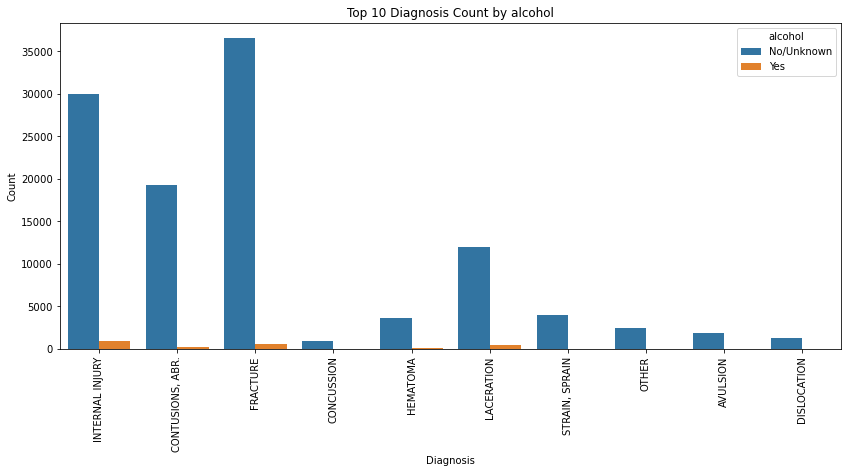

In [48]:
plt.figure(figsize=(14, 6))

sns.countplot(data=decoded_data_filtered, x='diagnosis', hue='alcohol')

plt.title('Top 10 Diagnosis Count by alcohol')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.xticks(rotation=90);

- ##### Insights on falls based on alchohol intake
The visualization shows that most falls aren't caused by alcohol intake.

##### Drug Intake Factors (Drugs vs Diagnosis)

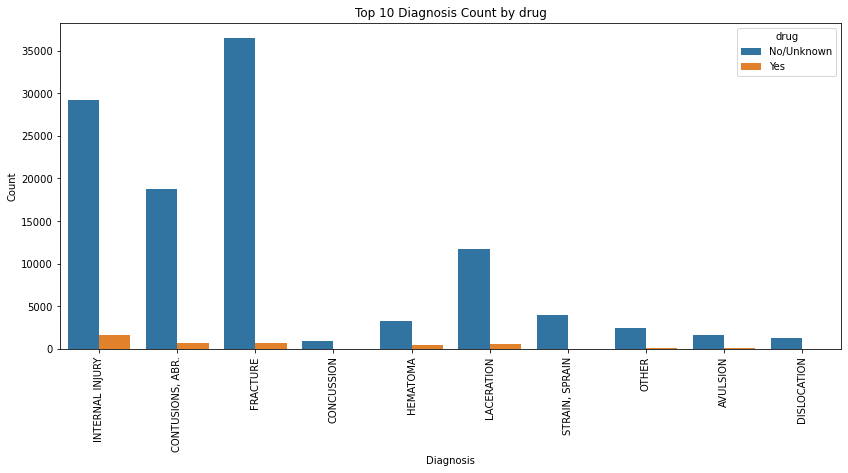

In [49]:
plt.figure(figsize=(14, 6))

sns.countplot(data=decoded_data_filtered, x='diagnosis', hue='drug')

plt.title('Top 10 Diagnosis Count by drug')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.xticks(rotation=90);

- ##### Insights on falls based on drug intake
This visualization shows that most of the falls are not caused by drugs as well

#### After checking out the factors relating to each patient, it's imperative to analyze the body parts most affected and also identify the common circumstances or activities during which falls occur among older adults 

##### Body Parts Most Affected (Body Part vs Diagnosis)

In [50]:

# First, calculate the count of diagnoses for each body part
body_part_counts = decoded_data_filtered['body_part'].value_counts()

# Select the top 10 body parts
top_10_body_parts = body_part_counts.head(10).index

# Filter the DataFrame to include only the top 10 body parts
filtered_data = decoded_data_filtered[decoded_data_filtered['body_part'].isin(top_10_body_parts)]

# Calculate the count of diagnoses for each combination of body part and diagnosis in the filtered data
heatmap_data = filtered_data.groupby(['body_part', 'diagnosis']).size().reset_index(name='count')

# Pivot the data to create a matrix suitable for a heatmap
heatmap_matrix = heatmap_data.pivot(index='body_part', columns='diagnosis', values='count')

# Replace non-finite values (NaN or inf) with 0
heatmap_matrix = heatmap_matrix.fillna(0)
heatmap_matrix = heatmap_matrix.replace([np.inf, -np.inf], 0)

# Convert the counts to integers after handling non-finite values
heatmap_matrix = heatmap_matrix.astype(int)



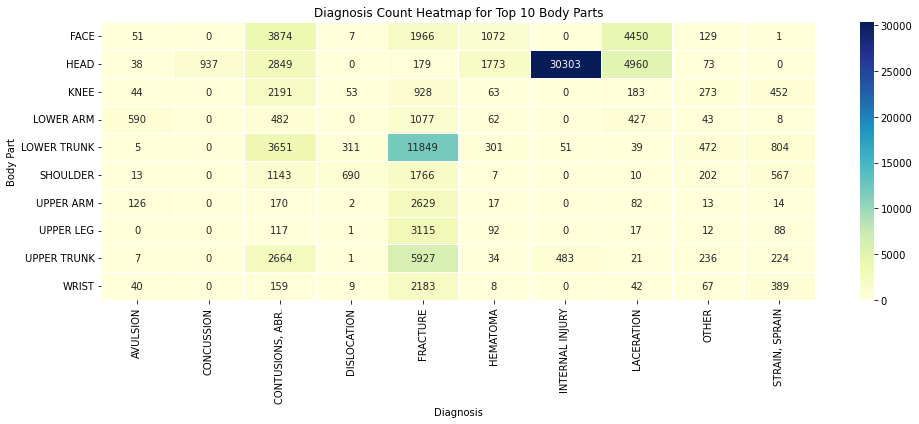

In [51]:
# Create a heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_matrix, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar=True)

plt.title('Diagnosis Count Heatmap for Top 10 Body Parts')
plt.xlabel('Diagnosis')
plt.ylabel('Body Part')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### The observation that older adults who fall and hit their head are more likely to have internal injuries, while those who hit their lower trunk are more likely to have fractures, indicates valuable insights that can inform both preventive measures and response strategies. Here are some insights and potential solutions derived from this observation:

**Insights:**

1. **High-Risk Areas:** The observation highlights specific body parts (head and lower trunk) as high-risk areas for older adults during falls. Understanding these high-risk areas is crucial for injury prevention.

2. **Common Injuries:** It identifies the most common types of injuries associated with falls in older adults, which are internal injuries and fractures.

3. **Correlation:** The strong correlation between the location of impact and the type of injury suggests a predictive relationship that can be valuable for early intervention and risk assessment.

**Solutions:**

1. **Fall Prevention Strategies:** Implement targeted fall prevention strategies that focus on reducing the risk of falls in older adults. These strategies may include:
   - **Home Safety:** Evaluate and improve home safety, removing hazards that could lead to falls.
   - **Exercise Programs:** Encourage older adults to participate in balance and strength training exercises to improve stability and reduce the risk of falling.
   - **Medication Management:** Review and adjust medications that may cause dizziness or unsteadiness.
   - **Vision Checks:** Ensure regular vision checks to correct any visual impairments that may contribute to falls.
   - **Footwear:** Promote appropriate footwear with good traction to prevent slipping.

2. **Education and Awareness:** Increase awareness among older adults and their caregivers about the risks associated with falls. Provide information about what to do in case of a fall and the importance of seeking medical attention, especially when head or trunk injuries occur.

3. **Early Assessment:** Encourage healthcare professionals to conduct thorough assessments after a fall, particularly focusing on head and lower trunk injuries. Rapid assessment can lead to early diagnosis and treatment, potentially reducing the severity of injuries.

4. **Fall Detection Devices:** Consider using fall detection devices or systems that can automatically detect falls and alert caregivers or emergency services. These devices can be especially helpful for individuals at high risk of falls.

5. **Medical Protocols:** Develop or update medical protocols for healthcare providers to ensure a comprehensive evaluation of older adults who have fallen, including imaging and diagnostic tests for head and trunk injuries.

6. **Supportive Care:** For older adults with a history of falls, offer supportive care and services that can help them maintain independence while minimizing risks. This may include home healthcare, rehabilitation, or assisted living options.



Remember that addressing fall-related risks and injuries in older adults is a multidisciplinary effort involving healthcare providers, caregivers, community organizations, and policymakers. These insights and solutions aim to enhance the safety and well-being of older adults and reduce the impact of falls on their health and quality of life.

#### Common circumstances surrounding falls among older adults 

A biagram is used here to analyze the 15 most common bigrams in the narrative column

In [52]:
#Import required modules
from nltk.tokenize import word_tokenize
from nltk import bigrams

from collections import Counter

Grab the 15 most common bigrams

In [69]:
#Initialize a list to store all tokens which will be need for future references
narrative_tokens = []

# Initialize a list to store preprocessed bigrams
preprocessed_bigrams = []

#Extract biagrams from each narrative
for sentence in decoded_data['narrative']:
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    narrative_tokens.append(tokens)
    
    # Create bigrams from the tokens
    bigrams_list = list(bigrams(tokens))
    
    # Append the preprocessed bigrams to the list
    preprocessed_bigrams.extend(bigrams_list)

# Count the frequency of each bigram
bigram_counts = Counter(preprocessed_bigrams)

# Get the top 15 most common bigrams and their counts
top_15_bigrams = bigram_counts.most_common(15)
bigram_labels, bigram_counts = zip(*top_15_bigrams)

Visualize the bigrams

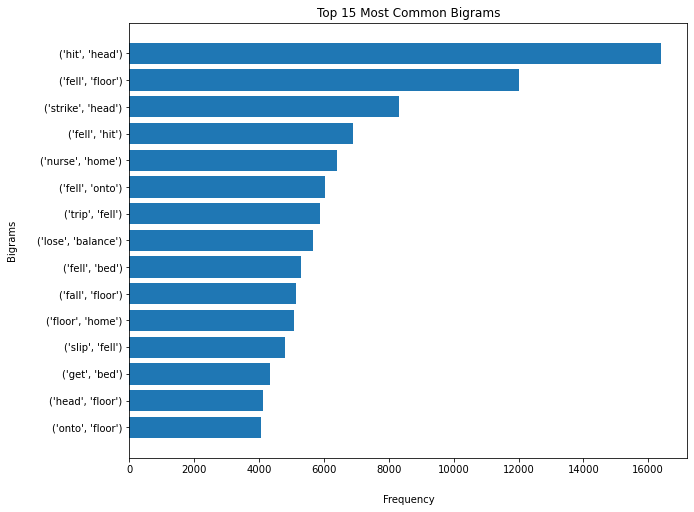

In [70]:
# Create a bar chart to visualize bigram frequencies
plt.figure(figsize=(10, 8))

plt.barh(range(len(bigram_labels)), bigram_counts)
plt.yticks(range(len(bigram_labels)), bigram_labels)

plt.xlabel('Frequency', labelpad = 20)
plt.ylabel('Bigrams', labelpad = 20)
plt.title('Top 15 Most Common Bigrams')

plt.gca().invert_yaxis()  # Invert the y-axis to display the most common at the top

- ##### Insights on common circumstances surrounding older adult falls
The bigrams provide insights into the reasons older adults fall while also noting the body part affected and also place of fall in some scenarios. Let's analyze each bigram and suggest potential solutions for fall prevention:

1. **Head Injury**: The presence of "head injury" indicates that head injuries are a significant outcome of falls among older adults. It's essential to focus on strategies to prevent head injuries, such as using protective headgear and implementing fall prevention programs.

2. **Hit Head**: Falls that lead to "hit head" indicate a potential problem with balance or coordination. Solutions may involve balance exercises, regular vision check-ups, and environmental modifications to reduce hazards.

3. **Close Head**: "Close head" could refer to injuries where the skull is not fractured but may still result in concussions or other head injuries. Preventive measures may include education on recognizing the signs of head injuries and seeking medical attention.

4. **Fell Floor**: "Fell floor" suggests that falls often result in individuals landing on the floor. This emphasizes the importance of strategies to minimize the impact of falls, including improving flooring materials to reduce injury risk.

5. **Strike Head**: Similar to "hit head," this bigram points to falls leading to head injuries. Strategies to reduce head injuries are relevant here.

6. **Fell Hit**: "Fell hit" represents falls that result in the older adults having their body part(s) hit an object. Fall prevention strategies should be implemented broadly, including home safety measures and regular exercise.

7. **Nurse Home**: The mention of "nurse home" suggests that falls occur in care facilities. Solutions may involve improved staff training, fall risk assessments, and environmental modifications in nursing homes.

8. **Fell Onto**: "Fell onto" highlights the presence of objects in the path of the older adults. Solutions may involve regular vision check-ups, and environmental modifications to reduce hazards.

9. **Trip Fell**: "Trip fell" highlights the role of tripping hazards in falls. Reducing tripping hazards, such as clutter and loose rugs, can help prevent falls.

10-15 which includes unique words such as dx, close, floor, home, head, fall, and contusion further highlight the listed bigrams insight above. An addition is that the presence of dx showcases diagnoses made by the abstractors, the term "home" showcases that some falls do occur at home and "contusions" highlight the fact that some falls do lead to contusions.

<pre>

</pre>
Based on these insights, here are some potential solutions for fall prevention among older adults:

1. **Fall Risk Assessments**: Conduct regular fall risk assessments for older adults, taking into account their health conditions, mobility, and living environment.

2. **Home Safety Modifications**: Promote home safety assessments and modifications, such as installing handrails, improving lighting, and removing tripping hazards.

3. **Balance and Strength Training**: Encourage older adults to engage in balance and strength training exercises to improve their physical stability and reduce the risk of falling.

4. **Medication Management**: Review and manage medications that may cause dizziness or affect balance, consulting with healthcare professionals as needed.

5. **Use of Mobility Aids**: Provide and educate older adults on the appropriate use of mobility aids such as walkers or canes.

6. **Regular Health Checkups**: Encourage older adults to have regular checkups with healthcare providers to address any underlying health issues that may contribute to falls.

7. **Educational Programs**: Offer educational programs to raise awareness about fall prevention, including information on recognizing fall risks and taking preventive measures.

8. **Environmental Modifications in Nursing Homes**: Improve the safety of nursing homes by implementing environmental modifications and staff training programs.

9. **Protective Headgear**: For older adults at risk of head injuries due to falls, consider the use of protective headgear, such as helmets or head protection.

10. **Regular Vision Exams**: Encourage older adults to have regular vision exams to ensure proper vision, which is crucial for balance and coordination.

Implementing a combination of these solutions tailored to individual needs and circumstances can significantly reduce the risk of falls among older adults and enhance their overall safety and well-being. Additionally, fostering a supportive and vigilant community or caregiver network can further contribute to fall prevention.

---

## 5. Model Building

#### 5.1 Starting with traditional topic modelling algorithms such as Latent Dirichlet Allocation (LDA) and Latent Semantic Indexing (LSI).

The approach here is to first find the optimum number of topics in the dataset and then print out the representative keywords for these optimum number of topics derived from the algorithm for each dataset. These keywords will give an unsupervised overview of the narrative column.

<pre>


</pre>
Import required modules

In [58]:
from gensim.models import LdaModel, LsiModel, CoherenceModel
from gensim import corpora

Create a document-term matrix that will be used for both the LDA & LSI models

In [71]:
def create_doc_term_mat(tokens):
    #Create a dictionary based on the tokenized sentences
    dict_tokens = corpora.Dictionary(tokens)
    
    #Create a document-term matrix using the sentence tokens
    doc_term_mat = [dict_tokens.doc2bow(token) for token in tokens]
    
    return doc_term_mat, dict_tokens

In [73]:
#Create a document-term matrix using the sentence tokens from earlier (during bigrams analysis)
narrative_doc_term_mat, narrative_dict_tokens = create_doc_term_mat(narrative_tokens)

Create several LDA and LSI models respectively based on the document-term matrix with topic numbers varying from 1 to 10, while focusing on the top 5 keywords in each topic

In [ ]:
#Assuming topic numbers from 1 to 10
num_topics = range(1, 8)
num_keywords = 5
    
lda_models, lda_topics = {}, {}
lsi_models, lsi_topics = {}, {}
    
for i in num_topics:
    #Create both LDA and LSI models per number of topics ranging from 1 to 10 in this case
    lda_models[i] = LdaModel(narrative_doc_term_mat, num_topics = i, id2word = narrative_dict_tokens, passes = 25)
    lsi_models[i] = LsiModel(narrative_doc_term_mat, num_topics = i, id2word = narrative_dict_tokens)
    
    #Append the words related to each topic to each model_topics dictionary respectively
    current_lda_topic = lda_models[i].show_topics(num_topics = i, num_words = num_keywords, formatted = False)
    lda_topics[i] = [[word[0] for word in topic[1]] for topic in current_lda_topic]
    
    current_lsi_topic = lsi_models[i].show_topics(num_topics = i, num_words = num_keywords, formatted = False)
    lsi_topics[i] = [[word[0] for word in topic[1]] for topic in current_lsi_topic]

Now find the optimum number of topics for the narratives from the several LDA and LSI models created

This is achieved by
- First calculating the mean stability of each model. This mean stability is derived by calculating the mean of the Jaccard similarities of the topics gotten by each model.
- Then, calculate the coherence of each model.
- And finally, the optimum number of topics for each model is derived from the maximum difference between the coherence and mean stabilty for the model

In [89]:
def jaccard_similarity(topic_1, topic_2):
    # Calculates the Jaccard similarity of two topics which is used to compare the similarity and diversity of sample sets
    topic_1, topic_2 = set(topic_1), set(topic_2)
    
    #Compute the intersection of the two sets
    intersection = topic_1.intersection(topic_2)
    len_intersection = len(intersection)
    
    #Compute the union of the two sets
    union = topic_1.union(topic_2)
    len_union = len(union)
    
    jaccard_sim = float(len_intersection)/float(len_union)
    
    return jaccard_sim

In [ ]:
def mean_stability(model_topics):
    # Calculates the mean of the Jaccard similarities of two topics
    
    num_topics = range(1, 8)   #Assuming topic numbers from 1 to 7
    
    model_stability = {}
    
    for num_topic in num_topics[:-1]:
        jaccard_sims = []
        
        for topic_1 in model_topics[num_topic]:
            sims = []
            for topic_2 in model_topics[num_topic + 1]:
                sims.append(jaccard_similarity(topic_1, topic_2))
                
            jaccard_sims.append(sims)
            
        model_stability[num_topic] = jaccard_sims
    
    #Compute the mean of the jaccard similarites of the topics derived from the model
    mean_stabilities = [np.array(model_stability[i]).mean() for i in num_topics[:-1]]
    
    return mean_stabilities

In [ ]:
def optimum_num_topics(models, topics, tokens, dict_tokens):
    num_topics = range(1, 8)   #Assuming topic numbers from 1 to 7
    
    #The optimum number of topics is derived by the difference between the coherence and the stability per number of topics
    coherences = [CoherenceModel(model = models[i], texts = tokens, dictionary = dict_tokens, 
                                 coherence = 'c_v').get_coherence() for i in num_topics[:-1]]
    
    mean_stabilities = mean_stability(topics)
    
    #Calculate the difference between the coherence and stability values for the total range of the assumed number of topics
    diff_coh_stab = [coherences[i] - mean_stabilities[i] for i in range(len(num_topics))[:-1]]
    max_coh_stab = max(diff_coh_stab)  #Getting the max number of topic numbers
    
    #Getting the index of the max number of topic numbers 
    max_index_coh_stab = [i for i, j in enumerate(diff_coh_stab) if j == max_coh_stab][0] 
    
    ideal_topic_num = num_topics[max_index_coh_stab]
    
    #Return the optimum number of topics and a second value for plotting purposes
    return ideal_topic_num, diff_coh_stab